In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./Sales_dataa/Sales_April_2019.csv')

# Merging 12 months data- into single file

In [7]:
files=[file for file in os.listdir('./Sales_dataa/')]
alll_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_dataa/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
#all_months_data.head()check,then load
all_months_data.to_csv("all_data.csv",index=False)

#Read-in updated dataframe

In [3]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleanup the data!

Drop rows of NAN

In [4]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'OR' and delete it

In [5]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

# Argument data with additional columns

In [6]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#Add a Sales column

In [7]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [8]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['city']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Question 1:
What was the best month for sales?How much was earned that month?

In [9]:
results=all_data.groupby('month').sum()
results

,Quantity Ordered,Price Each,Sales
month,,,
1,32709,5435305.14,5466770.19
2,40347,6566654.16,6606067.26
3,51015,8373623.49,8421301.14
4,61674,10103013.06,10172010.72
5,56001,9405375.39,9457820.25
6,45759,7686076.83,7733406.78
7,48216,7897618.68,7943327.28
8,40344,6691036.26,6733403.64
9,39327,6254976.27,6292680.39


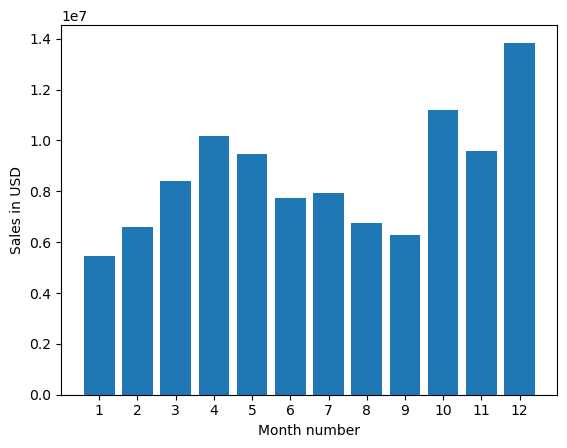

In [18]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel("Sales in USD")
plt.show()


# Question-2
What city had the highest number of sales?

In [10]:
results=all_data.groupby('city').sum()
results

,Quantity Ordered,Price Each,month,Sales
city,,,,
Atlanta (GA),49806,8339724.60,314382,8386495.74
Austin (TX),33459,5429620.83,209487,5458745.25
Boston (MA),67584,10912229.31,423336,10984926.03
Dallas (TX),50190,8257883.46,313860,8303926.20
Los Angeles (CA),99867,16264305.69,624975,16357712.40
New York City (NY),83796,13906112.49,527223,13992952.29
Portland (ME),8250,1341567.75,51432,1349274.81
Portland (OR),33909,5581674.66,211863,5612197.02
San Francisco (CA),150717,24634385.22,946560,24786611.73


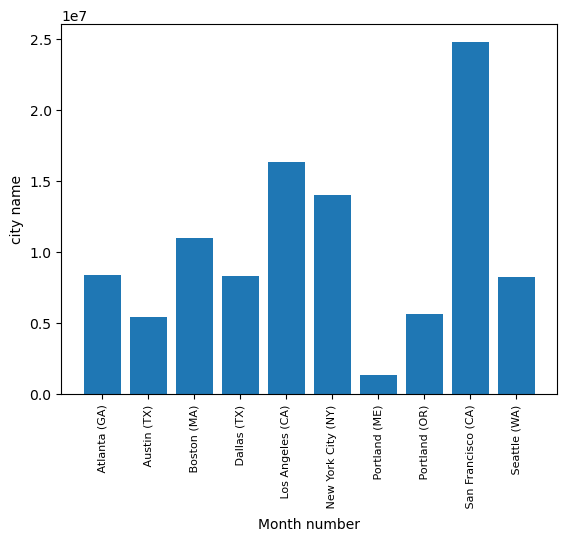

In [50]:
import matplotlib.pyplot as plt
cities=[city for city,df in all_data.groupby('city')]
plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('Month number')
plt.ylabel("city name")
plt.show()

# Question 3:
What time should we display advertisements to maximize likelihood of customer's buying product?

In [11]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [12]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute
all_data['count']=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour,minute,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


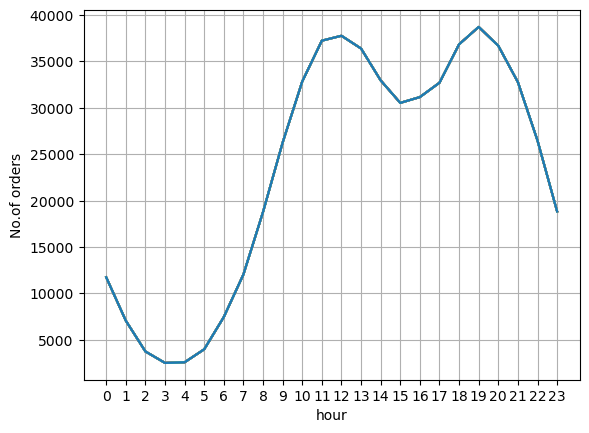

In [52]:
hours=[hour for hour,df in all_data.groupby('hour') ]
plt.plot(hours,all_data.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel('hour')
plt.ylabel('No.of orders')
plt.grid()
plt.show()

# Question 4
what products are more often sold together?

 #Counting similar order id's

In [25]:
df=all_data[all_data['Order ID'].duplicated(keep = False)]
#df.head()
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates('Grouped')
df.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
9,176565,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."


In [30]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')[0:]
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable') 216
('Wired Headphones', 'Wired Headphones') 210
('iPhone', 'iPhone') 201
('Google Phone', 'Google Phone') 195
('Lightning Charging Cable', 'Lightning Charging Cable') 195
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 153
('Apple Airpods Headphones', 'Apple Airpods Headphones') 153
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 138
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 132
('27in FHD Monitor', '27in FHD Monitor') 132


# Question-5
what product sold the most?why do you think it sold the most?

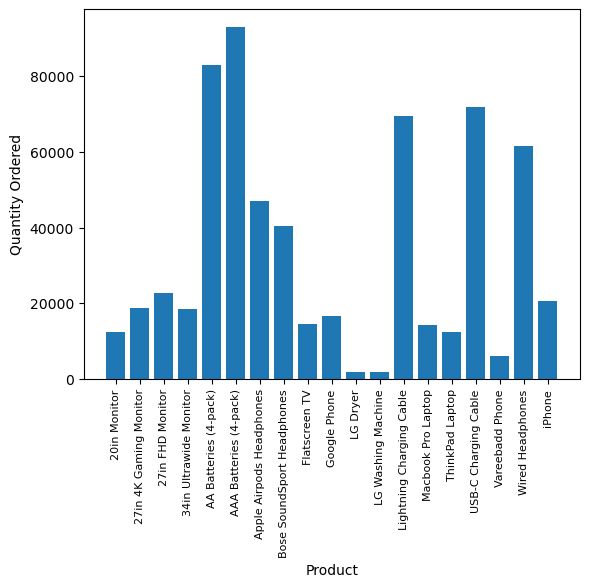

In [44]:
product_group = all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [45]:
prices=all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

we need to add 2nd y-axis to the chart

C:\Users\Hemu\AppData\Local\Temp\ipykernel_1700\3591451504.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Hemu\AppData\Local\Temp\ipykernel_1700\3591451504.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


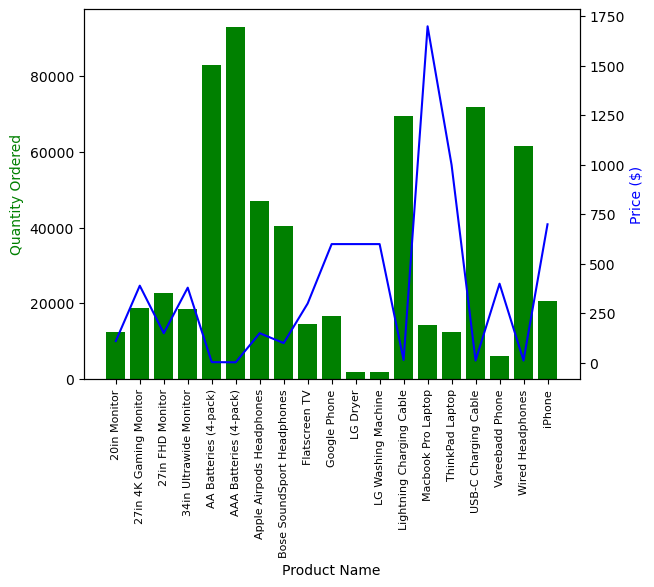

In [55]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()